In [2]:
# Impport Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn as sk
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Ignore warning messages
warnings.filterwarnings('ignore')

sns.set()

In [3]:
# Read dataset
df = pd.read_csv('C:/Users/danie/OneDrive/Documents/Study/DSC680 Capstone/creditcard_2023.csv')
df.shape

(568630, 31)

In [4]:
# Read data samples
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df = df.drop_duplicates()

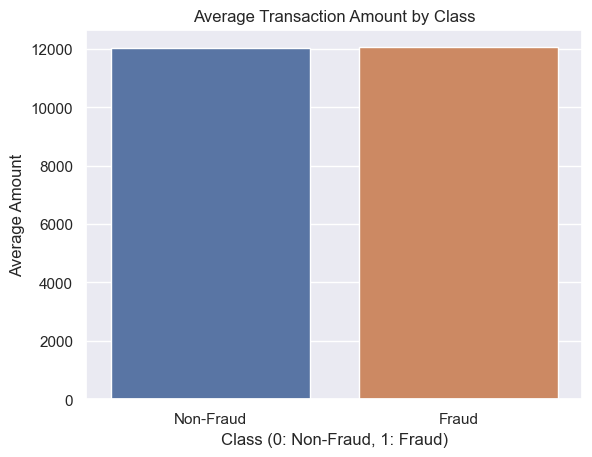

In [6]:
# Calculate average amount by class
average_amount_by_class = df.groupby('Class')['Amount'].mean().reset_index()

# Plotting
sns.barplot(x='Class', y='Amount', data=average_amount_by_class)
plt.title('Average Transaction Amount by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Average Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

# Save the plot
plt.savefig('average_amount_by_class.png')

plt.show()

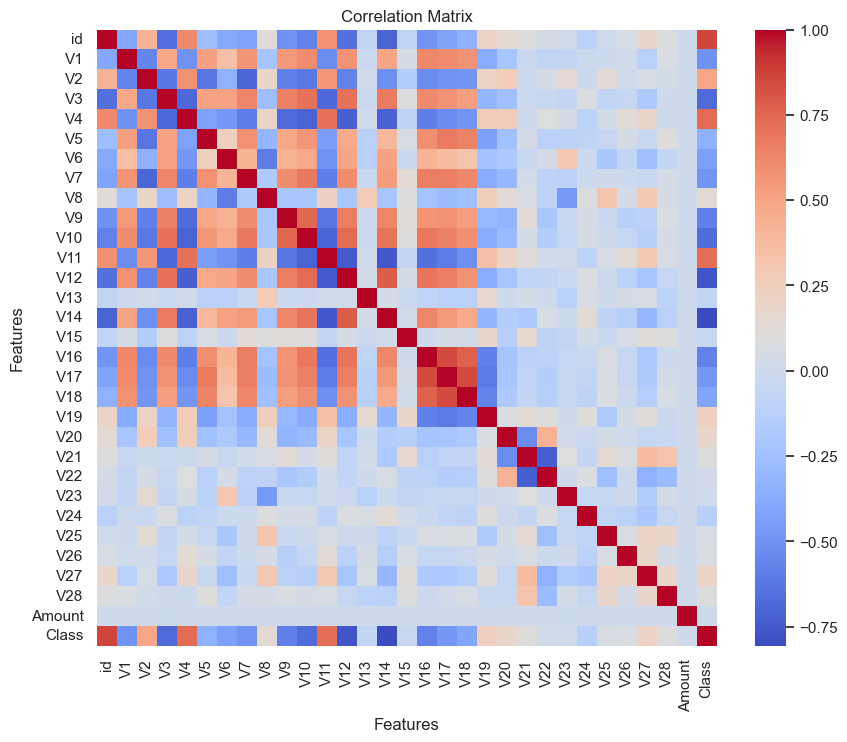

In [7]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm')

# Add titles and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Save the plot
plt.savefig('correlation_matrix.png')

# Show the plot
plt.show()

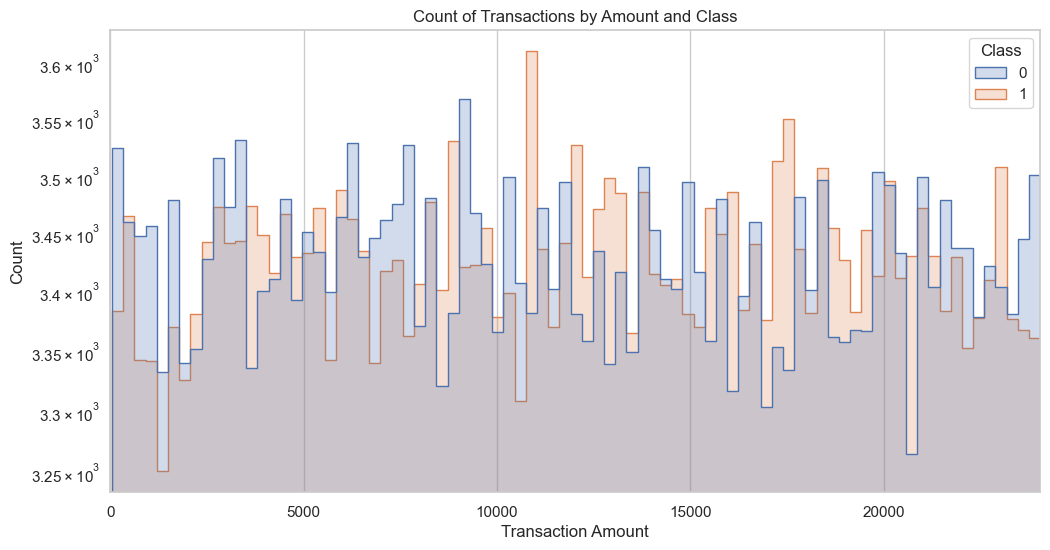

In [8]:
# Setting the plot style
sns.set(style="whitegrid")

# Creating a distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Amount", hue="Class", element="step", stat="count", common_norm=False)
plt.title('Count of Transactions by Amount and Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.yscale('log')  # Using log scale due to wide range of transaction amounts
plt.xlim([0, max(df['Amount'])])  # Limiting x-axis to max amount for better visualization

# Save the plot
plt.savefig('transaction_count_by_class.png')

plt.show()

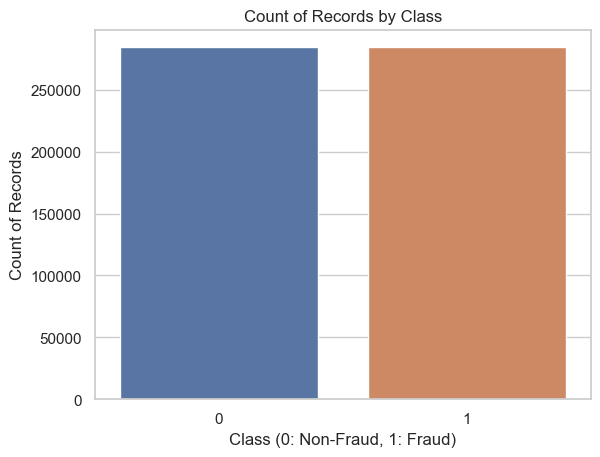

In [9]:
# Calculate count by class
count_by_class = df.groupby('Class')['id'].count().reset_index()

# Plotting
sns.barplot(x='Class', y='id', data=count_by_class)
plt.title('Count of Records by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count of Records')

# Save the plot
plt.savefig('count_records_by_class.png')

plt.show()

In [10]:
# Data Preprocessing
df.drop('id', axis=1, inplace=True)  # Dropping the 'id' column
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))  # Normalize 'Amount'


In [11]:
# Splitting the dataset
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [12]:
# Model Setup and Training
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Predictions
lr_y_pred = lr_model.predict(X_test)

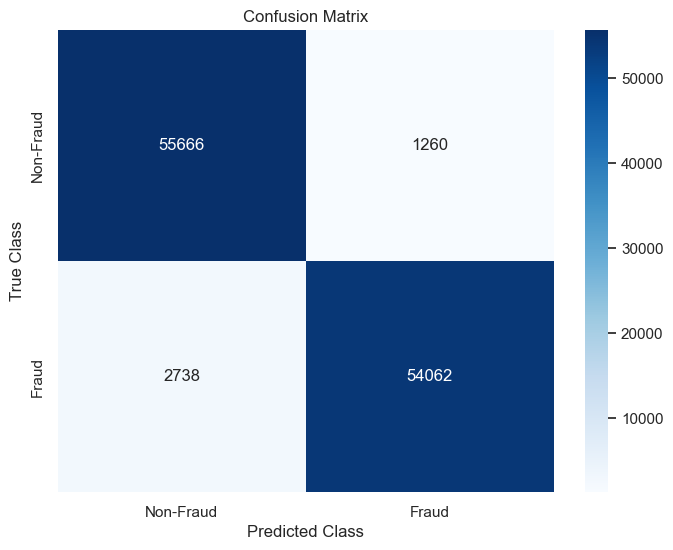

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, lr_y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [15]:
# Model Evaluation
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)

print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")

Accuracy: 0.9648453300036931
Precision: 0.9772242507501536
Recall: 0.9517957746478873
F1 Score: 0.9643424127289917


In [16]:
# To reduce proessing time we are trim down the data to top 15 correlation to class 

# Compute the absolute correlation matrix
correlation_matrix = df.corr().abs()

# Sort the features based on their correlation with 'Class'
sorted_correlation = correlation_matrix['Class'].sort_values(ascending=False)

# Select the top 15 features, excluding the 'Class' itself
top_15_features = sorted_correlation[1:16].index.tolist()

# Now you can use these top features for your model
X = df[top_15_features]
y = df['Class']

In [17]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
# Initialize a Random Forest classifier
rf = RandomForestClassifier(random_state=1)


In [19]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [4, 10],
    'criterion': ['gini']
}


In [20]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=10, cv=3,scoring='accuracy', verbose=2, random_state=1, n_jobs=-1)


In [21]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [4, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 300]},
                   random_state=1, scoring='accuracy', verbose=2)

In [22]:
# Best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Best Parameters: {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
Best Score: 0.9838581334537858


In [26]:
# This is the result from random_search to save processing time
#Best Parameters: {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
#Best Score: 0.9838581334537858
# Initialize the Random Forest classifier with the best parameters
rf_best = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=10, criterion='gini', random_state=1, n_jobs=-1)
rf_best.fit(X_train, y_train)

# Making predictions on the test set
rf_y_pred = rf_best.predict(X_test)

In [27]:
# Evaluation Metrics
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)


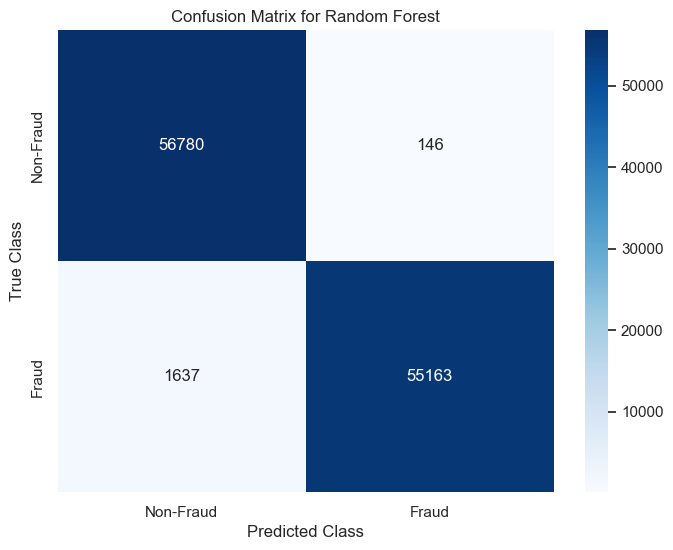

In [28]:
# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


In [29]:
# Print evaluation metrics
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

Accuracy: 0.9843
Precision: 0.9974
Recall: 0.9712
F1 Score: 0.9841
